In [30]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
# Set up plotting style
plt.style.use('default')  # Reset to default style
sns.set_palette("husl")   # color palette
 
#  display settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

In [31]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\labor.csv")
df.head()

,ind_key,unique_household_id,individual_no._in_hh,household_weight,individual_weight,gov,region,sex,brthyr,age,...,reduced_spending_health,reduced_spending_education,spent_savings,sold_consumed_livestock,borrowed_from_moneylender_bank,sold_jewelry,engaged_additional_income_generating_activities,received_financial_assistance_from_others,other_specify_[0],wages_modify
0,2581,23120201201_2303,1,2245.791016,2343.611084,Alex.,Alx. Sz C.,Male,1996,27,...,No,No,No,No,No,No,No,No,No,4020.50
1,66903,2.32E+14,1,1851.329346,1955.258423,Behera,Rur. Lwr.,Male,1977,46,...,No,No,No,No,No,No,No,No,No,4167.64
2,3395,23120204281,4,1778.171631,1855.595337,Alex.,Alx. Sz C.,Male,1991,31,...,No,No,No,No,No,No,No,No,No,2565.05
3,54808,2.32E+14,6,2696.524170,2813.976807,Alex.,Alx. Sz C.,Male,2000,23,...,No,No,No,No,No,No,No,No,No,2398.64
4,95,23120100241_1807,2,1248.177979,1302.544922,Cairo,Gr. Cairo,Male,1997,25,...,No,No,No,No,No,No,No,No,No,4080.34


In [32]:
df.duplicated().sum() # No duplicated rows

np.int64(0)

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv(r"C:\Users\DELL\Desktop\labor.csv")

df = df[df['monthly_wage'] > 0]   # إزالة القيم السالبة أو الصفرية في الأجر

df['ln_wage'] = np.log(df['monthly_wage']) # إنشاء متغير لوغاريتمي للأجر

## نموذج الانحدار
model = smf.ols(
    formula='ln_wage ~ age + C(sex) + C(region) + C(quintiles_household_wealth) + \
             C(educational_attainment)',
    data=df
).fit(cov_type='HC3')  # استخدام robust SEs

print(model.summary())  # Results

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     108.7
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:25:12   Log-Likelihood:                -13024.
No. Observations:               13817   AIC:                         2.609e+04
Df Residuals:                   13798   BIC:                         2.623e+04
Df Model:                          18                                         
Covariance Type:                  HC3                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     108.7
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:26:35   Log-Likelihood:                -13024.
No. Observations:               13817   AIC:                         2.609e+04
Df Residuals:                   13798   BIC:                         2.623e+04
Df Model:                          18                                         
Covariance Type:                  HC3                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

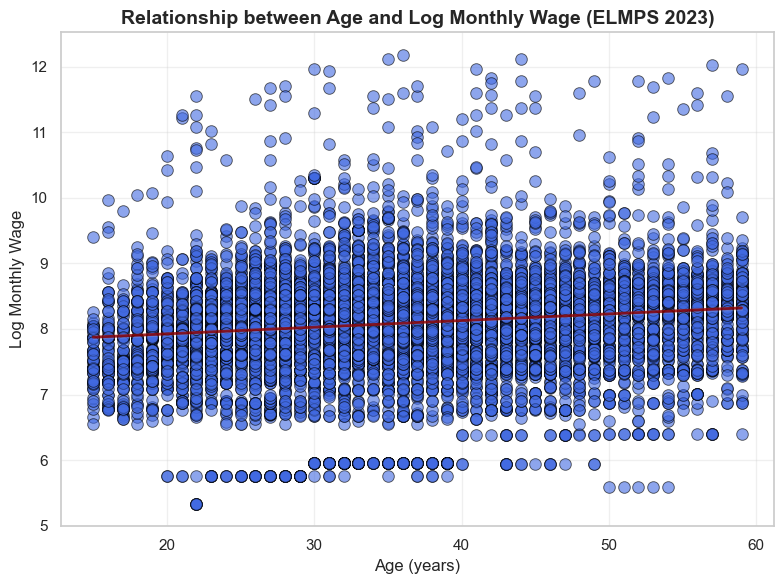

In [47]:
model = smf.ols(
    formula='ln_wage ~ age + C(sex) + C(region) + C(quintiles_household_wealth) + C(educational_attainment)',
    data=df
).fit(cov_type='HC3')
print(model.summary())

#  Scatter مع خط الانحدار

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='age',
    y='ln_wage',
    s=70,
    color='royalblue',
    edgecolor='black',
    alpha=0.6
)
sns.regplot(
    data=df,
    x='age',
    y='ln_wage',
    scatter=False,
    color='darkred',
    line_kws={'linewidth':2, 'alpha':0.8}
)

plt.title('Relationship between Age and Log Monthly Wage (ELMPS 2023)', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Log Monthly Wage', fontsize=12)

plt.tight_layout()
plt.show()



In [49]:
# تحليل أثر المهارات والعوامل الديموغرافية على استقرار العمل
# نموذج: Ordered Logistic Regression (Ordinal Logit)

import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Rate
mapping = {
    "Seasonal": 1,
    "Intermittent/ casual": 2,
    "Temporary (short-term)": 3,
    "Permanent": 4}

df["job_stability_code"] = df["job_stability"].map(mapping)

# Delete missing values

df = df.dropna(subset=[
    "job_stability_code",
    "computer_skills",
    "region",
    "sex",
    "age",
    "marital",
    "educational_attainment"])

### Indep varibles
# المتغيرات الفئوية نحولها إلى Dummies (باستبعاد أول فئة لتجنب Multicollinearity)

X = pd.get_dummies(
    df[["computer_skills", "region", "sex", "marital", "educational_attainment"]],
    drop_first=True,
    dtype=float)

# إضافة متغير العمر
X["age"] = df["age"].astype(float)

###  Dep varible
y = df["job_stability_code"].astype(int)

# 3. بناء النموذج (Ordered Logit)
model = OrderedModel(
    endog=y,
    exog=X,
    distr='logit'
)

result = model.fit(method='bfgs', disp=False)

print(result.summary())
print("\nCoefficients:\n", result.params) # Coefficients

                             OrderedModel Results                             
Dep. Variable:     job_stability_code   Log-Likelihood:                -10519.
Model:                   OrderedModel   AIC:                         2.109e+04
Method:            Maximum Likelihood   BIC:                         2.128e+04
Date:                Fri, 31 Oct 2025                                         
Time:                        17:30:56                                         
No. Observations:               13817                                         
Df Residuals:                   13792                                         
Df Model:                          22                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
computer_skills_Strong                              0.034

In [33]:
#Avg wage by edu
group2 = df.groupby(['educational_attainment'])[['monthly_wage']].agg('mean').round(2)  
group2['percentage'] = (group2['monthly_wage'] / group2['monthly_wage'].sum() * 100).round(2)
group2['percentage'] = group2['percentage'].astype(str) + '%'
group2

,monthly_wage,percentage
educational_attainment,,
General secondary,3867.67,10.71%
Post-graduate,6832.64,18.93%
Post-secondary institute,5452.25,15.1%
Preparatory,3241.03,8.98%
Primary,3474.01,9.62%
Reads & Writes,3871.99,10.73%
University,5192.95,14.39%
Vocational secondary,4166.59,11.54%


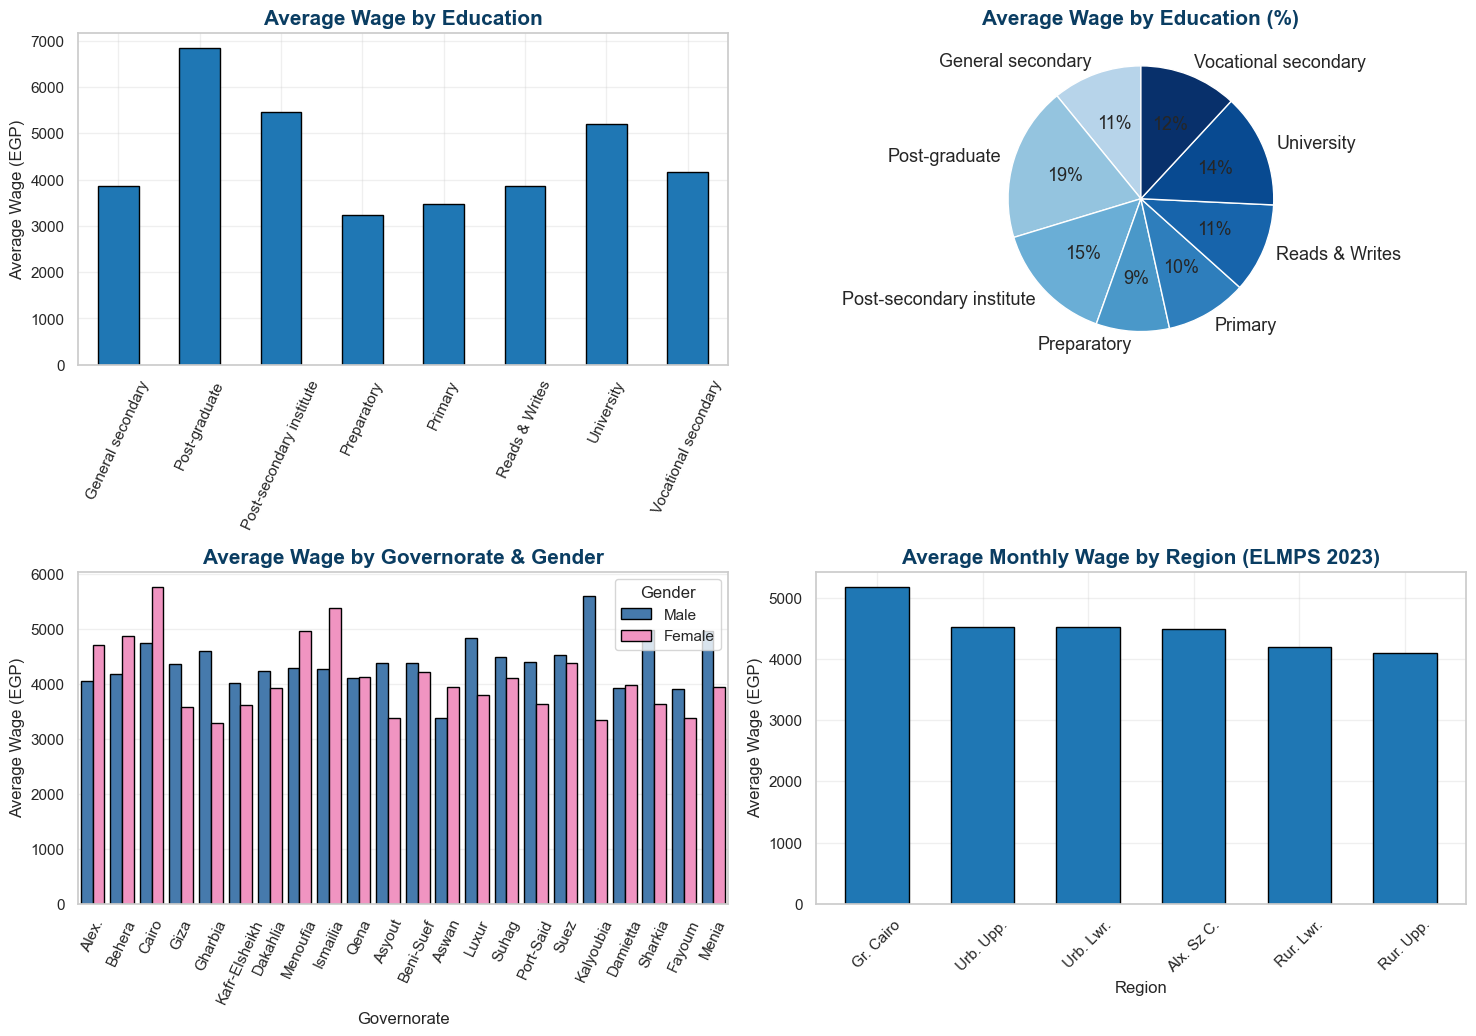

In [54]:
# matrix 2X2
fig, axes = plt.subplots(2, 2, figsize=(15, 10.5))
fig.patch.set_facecolor('white')

# 1) AVG wage by Edu 
group = df.groupby('educational_attainment')['monthly_wage'].mean()

# 1) Bar chart
group.plot(kind='bar', color='#1f77b4', ax=axes[0, 0], edgecolor='black')
axes[0, 0].set_title('Average Wage by Education', fontsize=15, color='#0A3D62', fontweight='bold')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Average Wage (EGP)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=65)

# 2) % of avg wage by edu
group3 = df.groupby(['educational_attainment'])[['monthly_wage']].agg('mean').round()
group3['percentage'] = (group3['monthly_wage'] / group3['monthly_wage'].sum() * 100).round()
colors = plt.cm.Blues(np.linspace(0.3, 1, len(group3)))

# 2) Pie Chart: % of avg wage by edu 
axes[0, 1].pie(
    group3['percentage'],
    labels=group3.index,
    autopct=lambda p: '{:.0f}%'.format(p),
    startangle=90,
    shadow=False,
    colors=colors,
    textprops={'fontsize': 13})

axes[0, 1].set_title("Average Wage by Education (%)", fontsize=15, color="#0A3D62", fontweight='bold')


# 3) Avg Wage by Gov & Gender 
sns.set(style="whitegrid")

# 3) Bar Avg Wage by Gov & Gender 
sns.barplot(
    data=df,
    x='gov',
    y='monthly_wage',
    hue='sex',
    ci=None,
    palette={'Male': '#357ABD', 'Female': '#ff85c1'},
    ax=axes[1, 0],
    edgecolor='black'
)
axes[1, 0].set_title('Average Wage by Governorate & Gender', fontsize=15, color='#0A3D62', fontweight='bold')
axes[1, 0].set_xlabel('Governorate', fontsize=12)
axes[1, 0].set_ylabel('Average Wage (EGP)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=65)
axes[1, 0].legend(title='Gender', loc='upper right', frameon=True, facecolor='white')

# 4) Avg Wage by Region
region_wage = df.groupby('region')['monthly_wage'].mean().sort_values(ascending=False)

# ---- (4) Bar Chart: Wage by Region ----
axes[1, 1].bar(region_wage.index, region_wage, color='#1f77b4', edgecolor='black', width=0.6)
axes[1, 1].set_title('Average Monthly Wage by Region (ELMPS 2023)', fontsize=15, color='#0A3D62', fontweight='bold')
axes[1, 1].set_xlabel('Region', fontsize=12)
axes[1, 1].set_ylabel('Average Wage (EGP)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

##############
plt.tight_layout(pad=1)
plt.show()


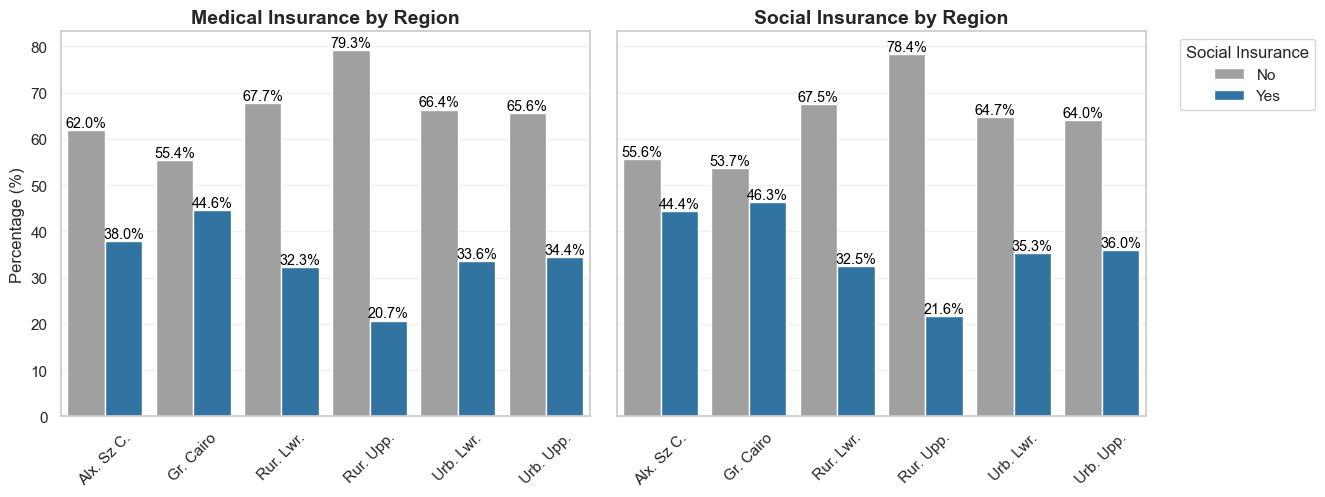

In [36]:
### Distribution of Medical and socail Insurance by Region
def prepare_percent(df, col):
    df[col] = df[col].replace({"Don't know": "No"})
    df_pct = df.groupby(['region', col]).size().reset_index(name='count')
    df_pct['percent'] = df_pct.groupby('region')['count'].transform(lambda x: 100*x/x.sum())
    return df_pct

def plot_insurance(ax, df_pct, col, title, palette):
    sns.barplot(data=df_pct, x='region', y='percent', hue=col, palette=palette,
                ax=ax, width=0.85)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(''); ax.set_ylabel('Percentage (%)' if ax==axes[0] else '')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title=col.replace('_',' ').title(), bbox_to_anchor=(1.05,1))
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10.4, color='black')
###
medical_pct = prepare_percent(df, 'medical_insurance_work')
social_pct = prepare_percent(df, 'social_insurance')

palette = {'Yes':'#1f77b4', 'No':'#a0a0a0'} # colors

#   الرسمتين جنب بعض
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)
sns.set_style("whitegrid")

plot_insurance(axes[0], medical_pct, 'medical_insurance_work', 'Medical Insurance by Region', palette)
plot_insurance(axes[1], social_pct, 'social_insurance', 'Social Insurance by Region', palette)

plt.subplots_adjust(wspace=0.05)
plt.show()


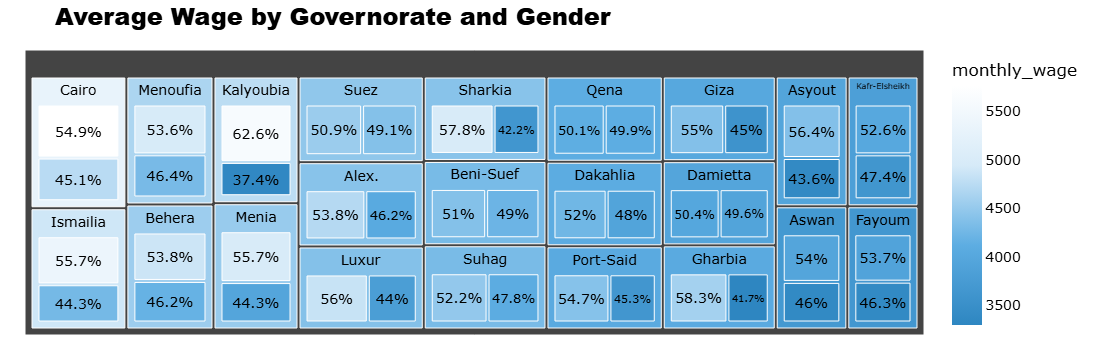

In [39]:
### % Average Wage by Governorate and Gender
df_clean = df.dropna(subset=['gov','sex','monthly_wage'])
avg_wage = df_clean.groupby(['gov','sex'], as_index=False)['monthly_wage'].mean()
avg_wage['percentage'] = (avg_wage['monthly_wage'] / avg_wage.groupby('gov')['monthly_wage'].transform('sum') * 100).round(1)

# Treemap
fig = px.treemap(
    avg_wage, 
    path=['gov','sex'],
    values='monthly_wage',
    color='monthly_wage',
    color_continuous_scale=['#2e86c1', '#5dade2', '#d6eaf8', '#ffffff'],
    title='Average Wage by Governorate and Gender',
    hover_data={'monthly_wage':':.0f', 'percentage':':.1f'},
    custom_data=['percentage'])
# font 
fig.update_traces(texttemplate="%{customdata[0]}%", textposition="middle center", textfont_color="black")
fig.update_layout(
    title_font=dict(size=24, color='#000000', family='Arial Black'),
    font=dict(size=14, color='#000000'),
    hoverlabel=dict(font_size=14, font_color='black'),
    paper_bgcolor='white',
    plot_bgcolor='white',
    margin=dict(t=50, l=25, r=25, b=25))

fig.show()


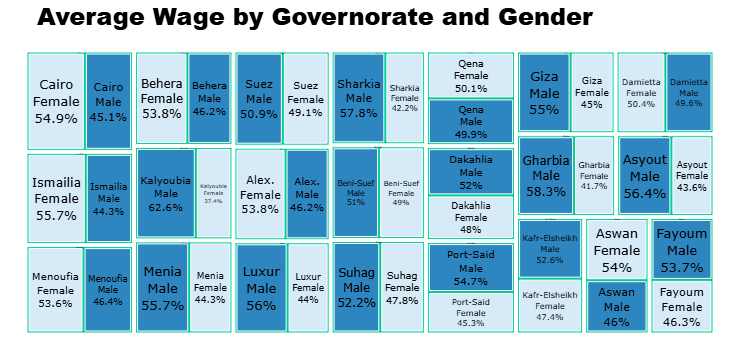

In [40]:
# تنظيف البيانات
df_clean = df.dropna(subset=['gov','sex','monthly_wage'])

# حساب المتوسط
avg_wage = df_clean.groupby(['gov','sex'], as_index=False)['monthly_wage'].mean()
avg_wage['percentage'] = (
    avg_wage['monthly_wage'] / avg_wage.groupby('gov')['monthly_wage'].transform('sum') * 100
).round(1)

# ألوان ثابتة
color_map = {
    'Male': '#2e86c1',   # أزرق غامق
    'Female': '#d6eaf8'  # أزرق فاتح
}

# Treemap
fig = px.treemap(
    avg_wage, 
    path=['gov','sex'],
    values='monthly_wage',
    color='sex',
    color_discrete_map=color_map,
    title='Average Wage by Governorate and Gender',
    hover_data={'monthly_wage':':.0f', 'percentage':':.1f'},
    custom_data=['gov', 'sex', 'percentage']  # ← نضيف اسم المحافظة والنوع
)

# تخصيص النص والخلفية
fig.update_traces(
    texttemplate="%{customdata[0]}<br>%{customdata[1]}<br>%{customdata[2]}%", 
    textposition="middle center", 
    textfont_color="black",
    marker=dict(
        line=dict(color='white', width=1),
        pad=dict(t=2, l=2, r=2, b=2)
    ),
    root_color='white'
)

# إعداد الشكل العام
fig.update_layout(
    title_font=dict(size=24, color='#000000', family='Arial Black'),
    font=dict(size=13, color='#000000'),
    hoverlabel=dict(font_size=14, font_color='black', bgcolor='white'),
    paper_bgcolor='white',
    plot_bgcolor='white',
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()


       region           job_stability  count    percent
0  Alx. Sz C.    Intermittent/ casual     77   8.037578
1  Alx. Sz C.               Permanent    810  84.551148
2  Alx. Sz C.                Seasonal     13   1.356994
3  Alx. Sz C.  Temporary (short-term)     58   6.054280
4   Gr. Cairo    Intermittent/ casual     78   7.831325
5   Gr. Cairo               Permanent    874  87.751004
6   Gr. Cairo                Seasonal      2   0.200803
7   Gr. Cairo  Temporary (short-term)     42   4.216867
8   Rur. Lwr.    Intermittent/ casual    449  10.793269
9   Rur. Lwr.               Permanent   3110  74.759615


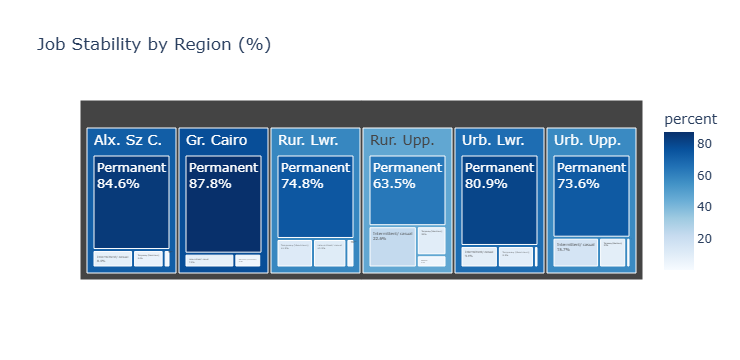

In [45]:
# حساب التوزيع والنسب المئوية
region_stability = (
    df.groupby(['region', 'job_stability'])
      .size()
      .reset_index(name='count'))

# حساب النسبة المئوية داخل كل إقليم
region_stability['percent'] = (
    region_stability.groupby('region')['count']
    .transform(lambda x: 100 * x / x.sum()))

# ترتيب الأعمدة للوضوح
region_stability = region_stability[['region', 'job_stability', 'count', 'percent']]
print(region_stability.head(10))  # عرض أول 10 صفوف للتأكد

#  رسم Treemap لتوزيع النسب
fig = px.treemap(
    region_stability,
    path=['region', 'job_stability'],
    values='percent',
    color='percent',
    color_continuous_scale='Blues',
    title='Job Stability by Region (%)')

fig.update_traces(
    texttemplate='%{label}<br>%{value:.1f}%',
    textfont_size=14)

fig.show()
